In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

## Data description

This exercise is based on subset of data for the ["Give Me Some Credit" Kaggle competition] (https://www.kaggle.com/c/GiveMeSomeCredit), follow this link and take a look at the competition description.

### Getting the data
Dowload the data file called `credit_scoring_sample.csv` from https://github.com/Yorko/mlcourse.ai/tree/master/data


### Data columns
Not all of these columns are present in the sample data we user for this exercise

 - **SeriousDlqin2yrs** (prediction target) - Person experienced 90 days past due delinquency or worse 
 - **RevolvingUtilizationOfUnsecuredLines** - Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits
 - **age** - Age of borrower in years
 - **DebtRatio** - Monthly debt payments, alimony, living costs divided by monthly gross income
 - **MonthlyIncome** - Monthly income
 - **NumberOfOpenCreditLinesAndLoans** - Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards)
 - **NumberRealEstateLoansOrLines** - Number of mortgage and real estate loans including home equity lines of credit
 - **NumberOfDependents** - Number of dependents in family excluding themselves (spouse, children etc.)
 - **NumberOfTimes90DaysLate** - Number of times borrower has been 90 days or more past due.
 - **NumberOfTime60-89DaysPastDueNotWorse**	 - Number of times borrower has been 60-89 days past due but no worse in the last 2 years.
 - **NumberOfTime30-59DaysPastDueNotWorse** - Number of times borrower has been 30-59 days past due but no worse in the last 2 years.


In [2]:
df = pd.read_csv('credit_scoring_sample.csv', sep=';')

In [3]:
df.head().T

,0,1,2,3,4
SeriousDlqin2yrs,0.000000,0.0,0.000000,0.00000,1.00000
age,64.000000,58.0,41.000000,43.00000,49.00000
NumberOfTime30-59DaysPastDueNotWorse,0.000000,0.0,0.000000,0.00000,0.00000
DebtRatio,0.249908,3870.0,0.456127,0.00019,0.27182
NumberOfTimes90DaysLate,0.000000,0.0,0.000000,0.00000,0.00000
NumberOfTime60-89DaysPastDueNotWorse,0.000000,0.0,0.000000,0.00000,0.00000
MonthlyIncome,8158.000000,NaN,6666.000000,10500.00000,400.00000
NumberOfDependents,0.000000,0.0,0.000000,2.00000,0.00000


#### How many columns and samples do we have in this dataset?

In [4]:
df.shape

(45063, 8)

#### What percentage of people in this dataset had serious delinquency?
 - It's the first column `SeriousDlqin2yrs`
 - This is the column we will be trying to predict today

In [5]:
str((df.SeriousDlqin2yrs.sum() / df.shape[0]) * 100) + "%"

'22.248851607749152%'

#### What accuracy score would you expect from the optimistic classifier that expects no delinquency at all?
 - This is called the Null accuracy
 - Verify that accuracy score using the `accuracy_score()` function


In [6]:
from sklearn.metrics import accuracy_score
# would expect 78% accuracy 
# sklearn.
zeros = np.zeros(df.shape[0])
accuracy_score(df.SeriousDlqin2yrs, zeros)

0.7775114839225085

#### Are there any columns with missing (NaN) values?
Hint: isnull()

In [7]:
df.isnull().head()

,SeriousDlqin2yrs,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,MonthlyIncome,NumberOfDependents
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False


#### Fill in all the missing values using the median value of the corresponding column
Hint: fillna()

In [8]:
cleaned_df = df.fillna(df.median())

#### Define X and y to experiment with some classifiers below

In [9]:
# We will be using all the columns except the target to base our preidctions on
# This is the list of the columns
cols = df.columns[1:].tolist()

In [10]:
X = cleaned_df[cols]
y = cleaned_df.SeriousDlqin2yrs

#### Train a DecisionTreeClassifier using ALL the data and find the accuracy_score

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
dtc = DecisionTreeClassifier()

In [13]:
dtc.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#### Repeat the above with different values of max_depth in the range between 2 and 15. Plot the accuracy score as a function of max_depth
- max_depth is passed to the constructor when creating an instance of DecisionTreeClassifier. It is the maximum depth the decision tree is allowed to have and works as a way to avoid overfitting. By default, without max_depth specified DecisionTreeClassifier will split until all leaf nodes are pure (contain only samples of one class). In most cases this is sever overfitting (similar to kNN with k=1)

In [14]:
depths = list(range(2,15))

accuracies = []

for depth in depths:
    dtc = DecisionTreeClassifier(max_depth=depth)
    dtc.fit(X, y)
    y_pred = dtc.predict(X)
    accuracies.append(accuracy_score(y_pred, y))

Text(0.5,0,'Depth')

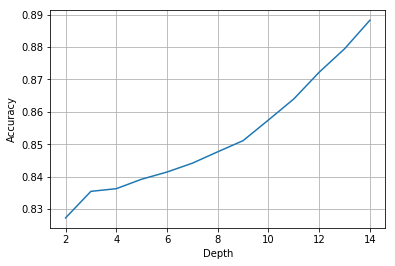

In [15]:
# plot
plt.plot(depths, accuracies)
plt.grid()
plt.ylabel("Accuracy")
plt.xlabel("Depth")

#### At this point we still have no idea how well our tree performs on "out of sample" data. Repeat the loop above, but instead of finding the training accuracy score, find the 5-fold corss_validation score on each iteration. Plot the scores as a function of max depth.

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [18]:
# depths = list(range(2,15))

cross_valid_accuracies = []

for depth in depths:
    dtc = DecisionTreeClassifier(max_depth=depth)
    dtc.fit(X_train, y_train)
    y_pred = dtc.predict(X_test)
    cross_valid_accuracies.append(cross_val_score(dtc, X_test, y_test, cv=5))

Text(0.5,0,'Depth')

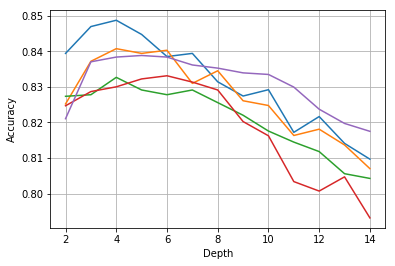

In [23]:
# plot
plt.plot(depths, cross_valid_accuracies)
plt.grid()
plt.ylabel("Accuracy")
plt.xlabel("Depth")

#### Based on the plot of CV scores, what is the best value for max depth?

In [24]:
maxDepth = depths[np.argmax(cross_valid_accuracies)]
maxDepth

12

#### Let's create a random forest of 20 decision trees using the optimal value for max depth

In [27]:
from sklearn.ensemble import BaggingClassifier
tree = DecisionTreeClassifier(max_depth=maxDepth)
forest = BaggingClassifier(dtc, n_estimators=20)

#### Find the 5-fold CV score for the `forest` classifier

In [87]:
cross_val_score(forest, X, y, cv=5)

array([0.83337031, 0.83989793, 0.83022636, 0.84198846, 0.83277852])

#### Split the data into training and testing sets use 40% of the data for testing

In [88]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=.4)

#### Fit both the forest and the single tree using the training data

In [89]:
forest.fit(X_train1, y_train1)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=14,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=20, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [90]:
tree.fit(X_train1, y_train1)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=12,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#### Find the predictions according to both the tree and the forest classifiers and the corresponding accuracy scores

In [93]:
accuracy_score(y_test1, tree.predict(X_test1))

0.8241429046932209

In [94]:
accuracy_score(y_test1, forest.predict(X_test1))

0.8327415954732054

#### Take a look at the `confusion_matrix` for the above two predictions and the dummy
 - Where are the actual classes and where the predicted ones are?
 - Try also looking at the matrices using percentage of the samples rather than counts (divide by total number of samples)

In [95]:
from sklearn.metrics import confusion_matrix

In [96]:
confusion_matrix(y_test1, dtc.predict(X_test1))

array([[13386,   681],
       [ 1801,  2158]])

In [97]:
confusion_matrix(y_test1, forest.predict(X_test1))

array([[13169,   898],
       [ 2117,  1842]])

#### Take a look a the confusion matrix for the dummy prediction that predicts no delinquency at all

In [101]:
confusion_matrix(y_test1, np.zeros(y_test1.shape[0]))

array([[14067,     0],
       [ 3959,     0]])

#### Compute the Sensitivity, Specificity and Precision based on each of the confusion matrices
 - Use [Kavin Markham's notebook](https://github.com/justmarkham/scikit-learn-videos/blob/master/09_classification_metrics.ipynb) as reference

In [134]:
# Sensitivity is also called recall, and there is a special function sklearn.metrics.recall_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [107]:
recall_score(y_test1, np.zeros(y_test1.shape[0]))

0.0

In [106]:
recall_score(y_test1, forest.predict(X_test1))

0.4652690073250821

In [132]:
# Sensitivity manual computation

y_pred = forest.predict(X_test1)

true_positives = (y_test1[y_pred == y_test1] == 1).sum()
false_negatives = (y_test1[y_pred != y_test1] == 1).sum()

true_positives / (false_negatives + true_positives)

0.4652690073250821

In [135]:
precision_score(y_test1, forest.predict(X_test1))

0.6722627737226278

In [136]:
# Precision manual computation

y_pred = forest.predict(X_test1)

true_positives = (y_test1[y_pred == y_test1] == 1).sum()
false_positives = (y_test1[y_pred != y_test1] == 0).sum()

true_positives / (true_positives + false_positives)

0.6722627737226278